In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('Sales Channel Prediction.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
import pandas_profiling as pp
pp.ProfileReport(df)

## In Data Analysis we will analize to find out the below stuff

1.Missing Values
2.All The Numerical Variables
3.Distribution of the Numerical Variables
4.Categorical Variables
5.Cardinality of Categorical Variables
6.Outliers
7.Relationship between independent and dependent feature(sales)


## Missing Values

In [10]:
#Here we will find out the percentage of nan of each feature
## step 1 make the list of feature and which has missing values
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

## step 2-peint the feature name and the percnetage of feature name
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4), '%missing values')


## Observation(s):
from the dataset there is no missing value    
    

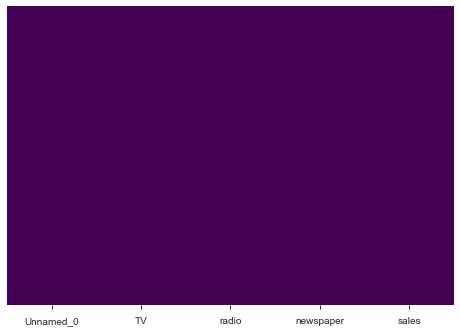

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

With the help of seaborn it is clearly visible there is no missing values

## Numerical Variables

In [12]:
#List of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='O']
 
print('Number of numerical variables', len(numerical_features))
df[numerical_features].head()

Number of numerical variables 5


,Unnamed_0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
#Numercal variables are usualy two types
## Continuous variabels and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete value count:{}".format(len(discrete_feature)))

Discrete value count:0


In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Unnamed_0']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [15]:
continuous_feature

['TV', 'radio', 'newspaper', 'sales']

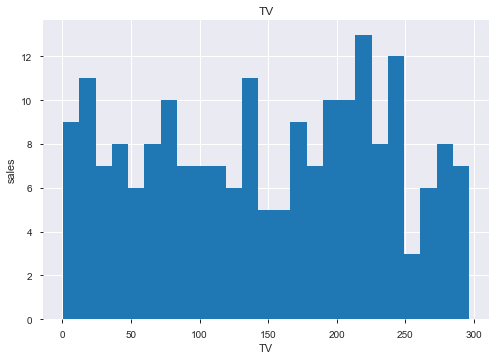

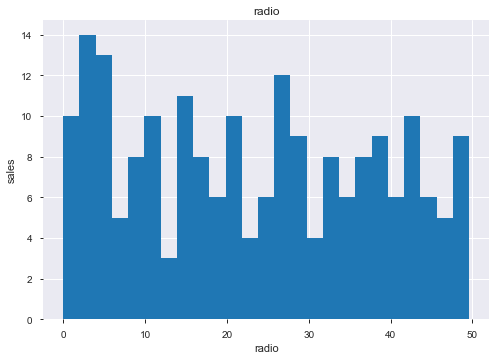

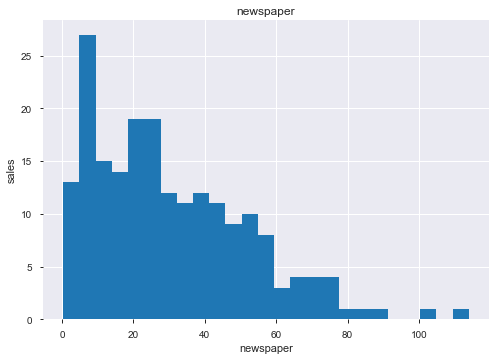

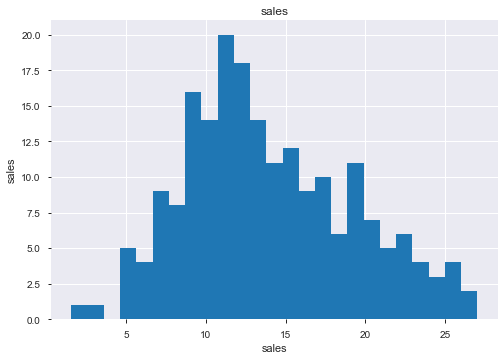

In [16]:

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('sales')
    plt.title(feature)
    plt.show()

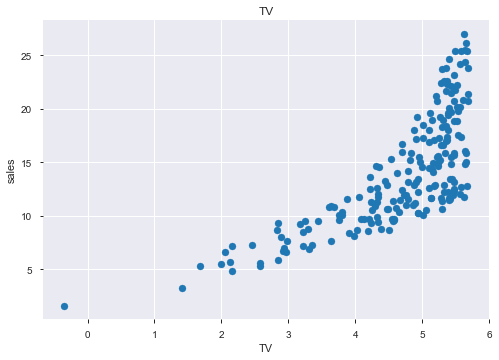

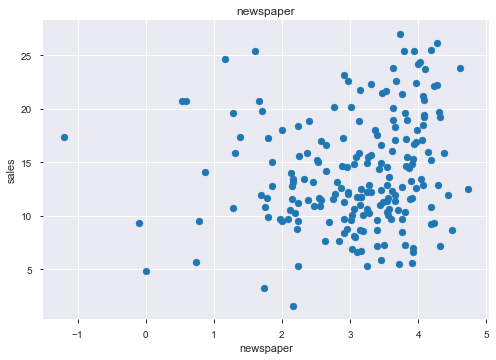

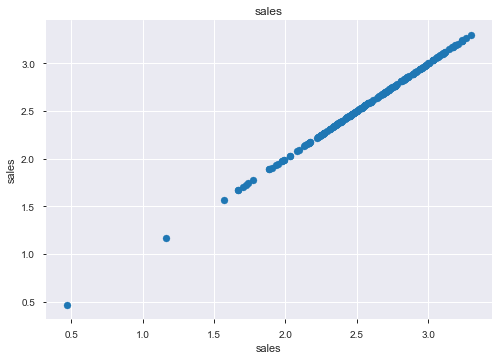

In [17]:
## we will use a Logrithmic Transformation 
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(df[feature])
        plt.scatter(data[feature],data['sales'])
        plt.xlabel(feature)
        plt.ylabel('sales')
        plt.title(feature)
        plt.show();

## Outliers

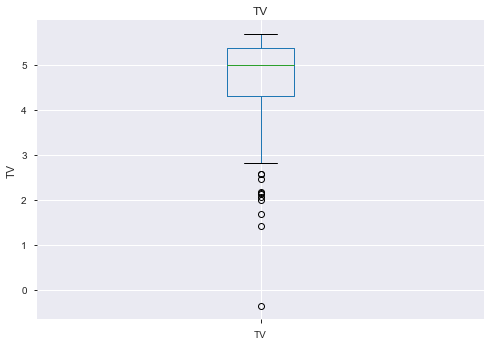

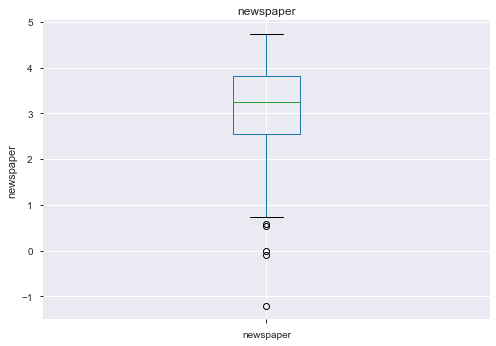

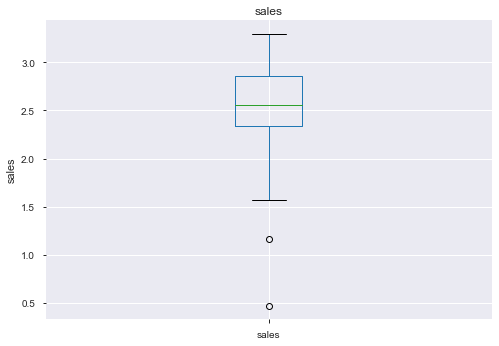

In [18]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show();

## Categorical Variables

In [19]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

[]

## Observation(s):
Ther is no categorical variables in the dataset        

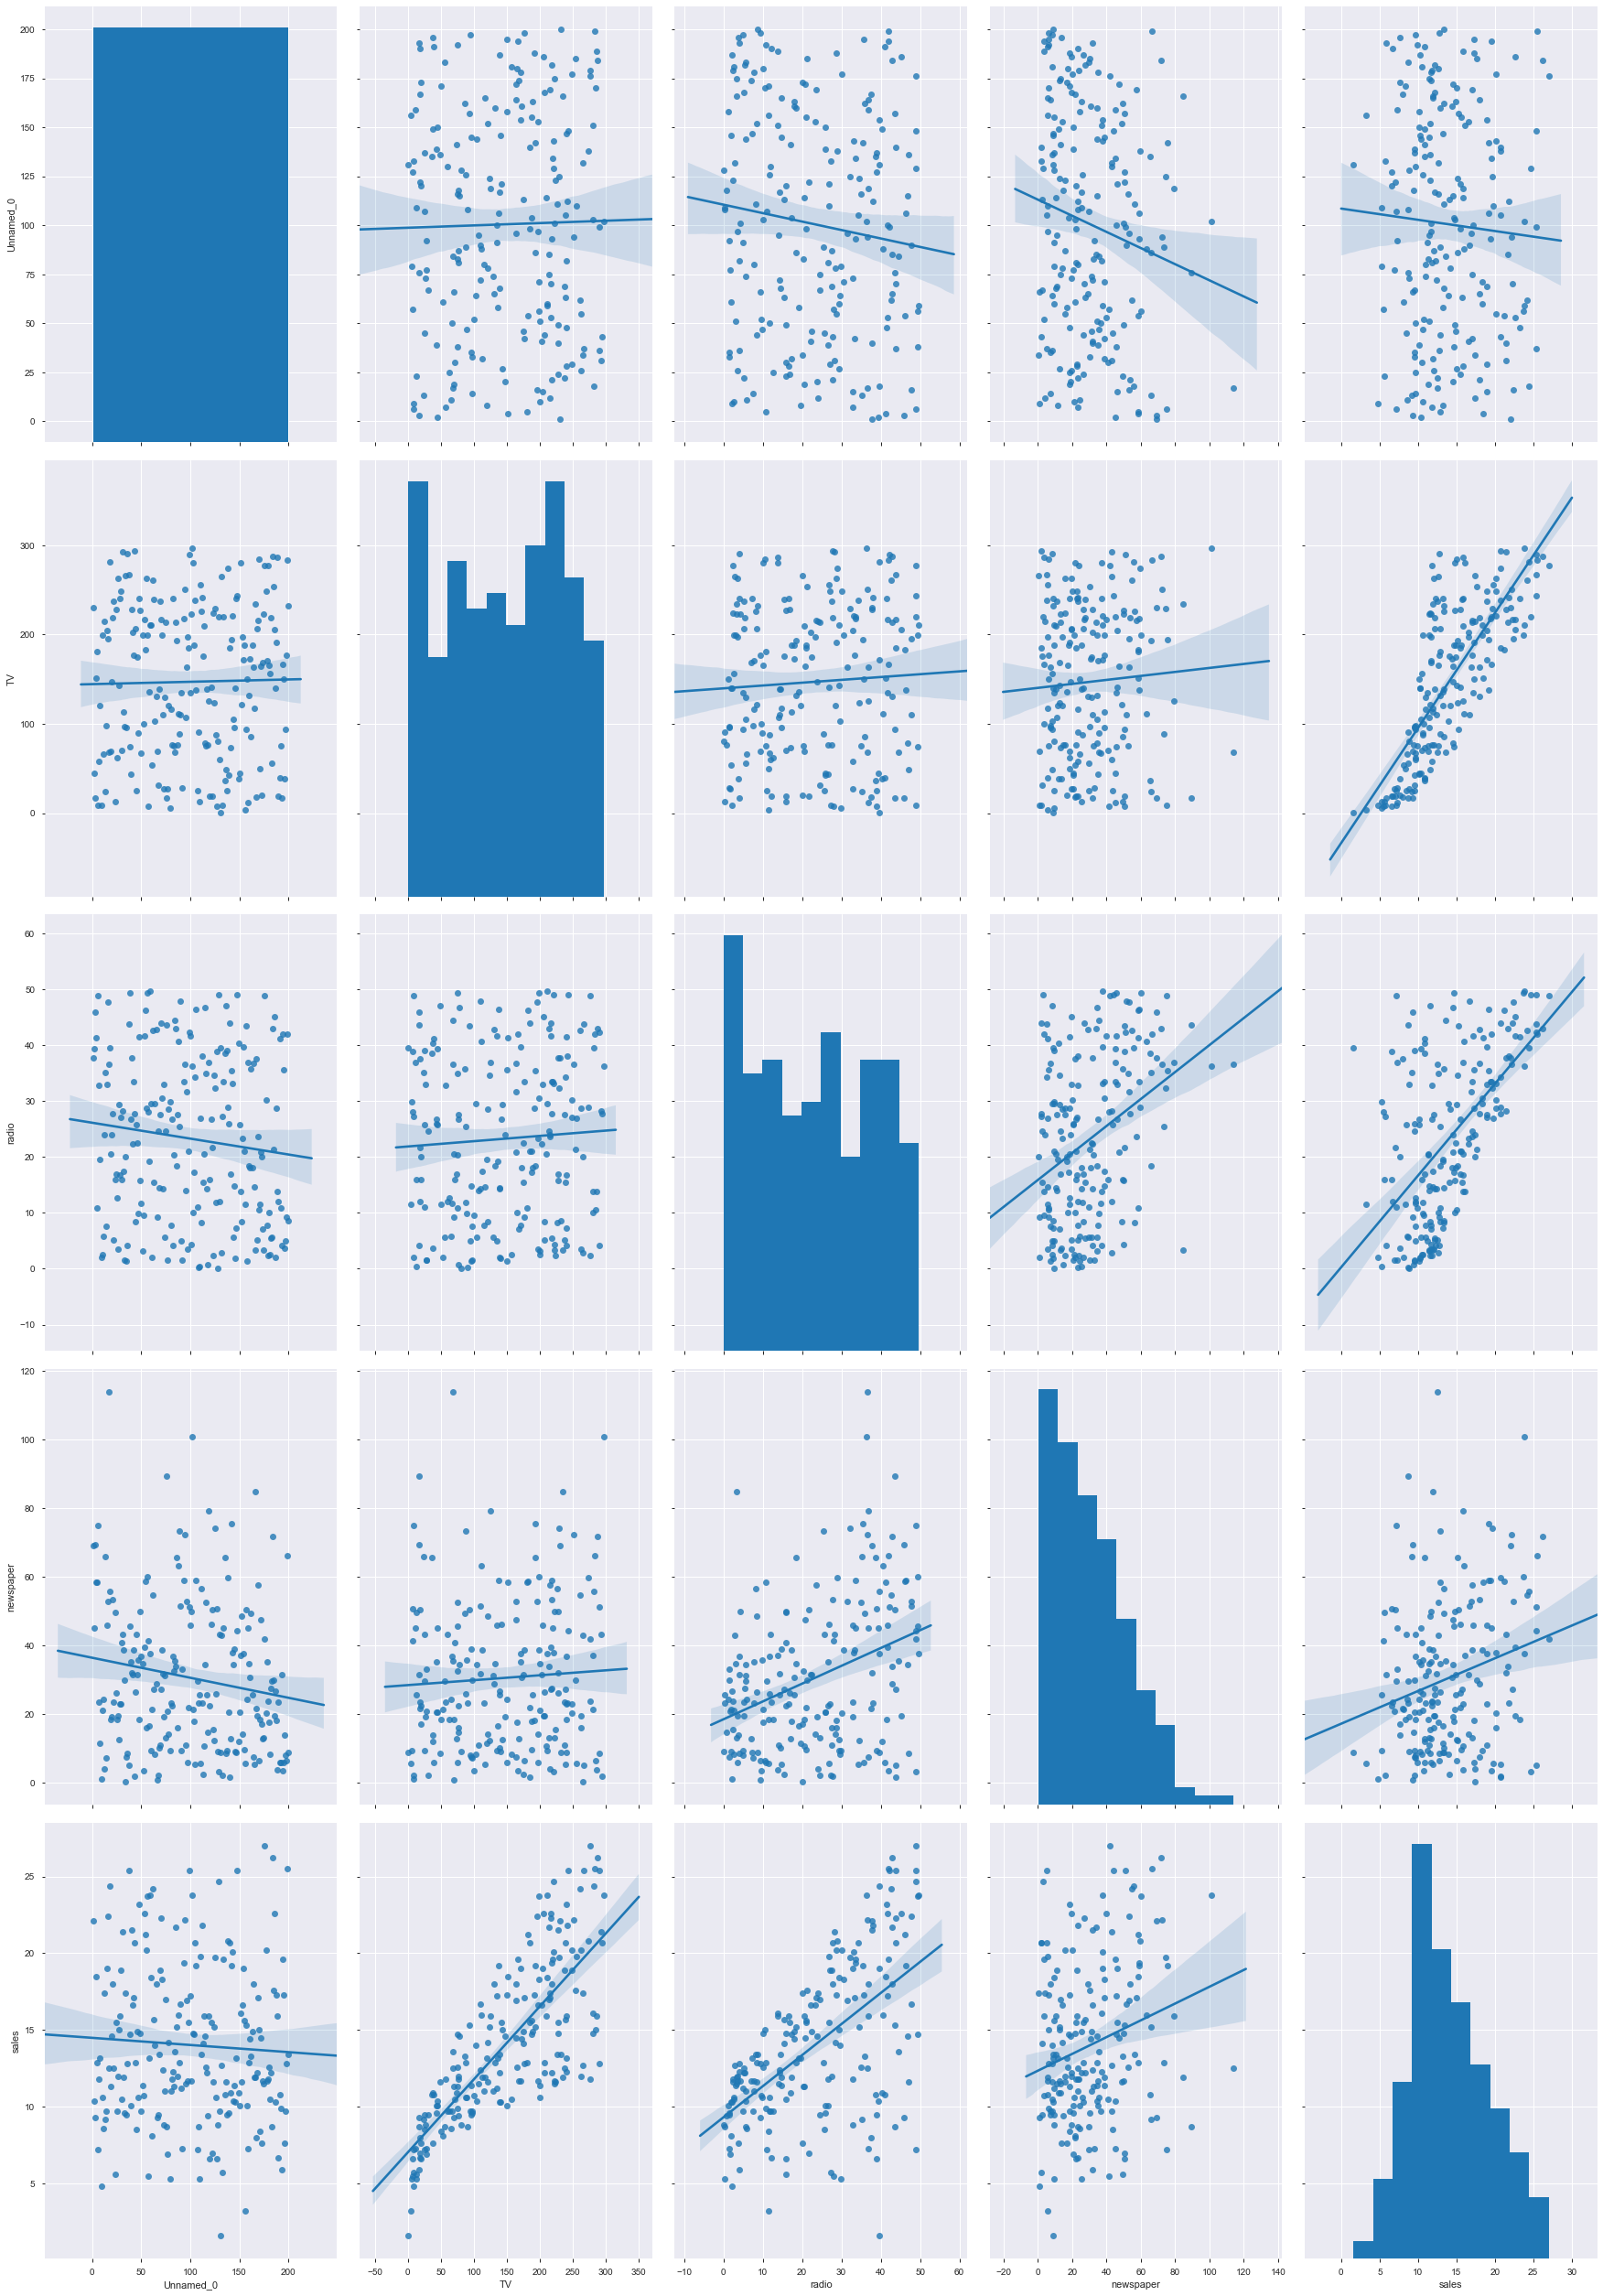

In [20]:
sns.pairplot(df,size=7,aspect=0.7,kind='reg', )

In [21]:
df.columns

Index(['Unnamed_0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

## Feature Engineering

In [22]:
df.head()

,Unnamed_0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['sales'],test_size=0.1,random_state=0)

In [24]:
X_train.shape, X_test.shape

((180, 5), (20, 5))

## Missing Values

In [25]:
#Replace 0 with NaN

In [26]:
df[['radio']]=df[['radio']].replace(0,np.nan)

In [27]:
df.isnull().sum()

Unnamed_0    0
TV           0
radio        1
newspaper    0
sales        0
dtype: int64

In [28]:
df.isnull().sum()/len(df)*100

Unnamed_0    0.0
TV           0.0
radio        0.5
newspaper    0.0
sales        0.0
dtype: float64

In [29]:
df['radio'].fillna(df['radio'].median(),inplace=True)

In [30]:
df.isnull().sum()/len(df)*100

Unnamed_0    0.0
TV           0.0
radio        0.0
newspaper    0.0
sales        0.0
dtype: float64

## Outlier Removing

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed_0     99.500
TV           144.450
radio         26.450
newspaper     32.350
sales          7.025
dtype: float64


In [32]:
df_without_outliers=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [33]:
df_without_outliers.dropna(inplace=True)

In [34]:
print(df.info())
print('*********************************************************************************')
print(df_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed_0    200 non-null int64
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 5 columns):
Unnamed_0    198 non-null int64
TV           198 non-null float64
radio        198 non-null float64
newspaper    198 non-null float64
sales        198 non-null float64
dtypes: float64(4), int64(1)
memory usage: 9.3 KB
None


## Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [35]:
df_without_outliers.head()

,Unnamed_0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [36]:
import numpy as np
num_features=['TV', 'radio', 'newspaper', 'sales']

for feature in num_features:
    df[feature]=np.log(df_without_outliers[feature])

In [37]:
df_without_outliers.head()

,Unnamed_0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Feature Scaling

In [38]:
feature_scale=[feature for feature in df_without_outliers.columns if feature not in ['Unnamed_0','sales']]

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_without_outliers[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
scaler.transform(df[feature_scale])

array([[ 0.01617792,  0.06759248,  0.04418632],
       [ 0.01056842,  0.06838184,  0.03938139],
       [ 0.00732301,  0.07153073,  0.04420252],
       [ 0.01475106,  0.06938869,  0.04230109],
       [ 0.0153547 ,  0.04218146,  0.04228188],
       [ 0.00499598,  0.07281496,  0.04508965],
       [ 0.01144344,  0.06471457,  0.0320651 ],
       [ 0.01396093,  0.05427038,  0.02414147],
       [ 0.00495651,  0.00896425, -0.003367  ],
       [ 0.01569586,  0.01329638,  0.0309091 ],
       [ 0.01191932,  0.02957115,  0.03239453],
       [ 0.01594142,  0.05837837,  0.01219186],
       [ 0.00843184,  0.06608927,  0.04363792],
       [ 0.01324634,  0.03505372,  0.01878879],
       [ 0.01576856,  0.06477632,  0.03960316],
       [ 0.01561983,  0.07231098,  0.04117175],
       [        nan,         nan,         nan],
       [ 0.01686506,  0.06853609,  0.04177075],
       [ 0.0120758 ,  0.05518103,  0.02925815],
       [ 0.01465507,  0.05829368,  0.02973837],
       [ 0.01599976,  0.06128666,  0.041

In [41]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df_without_outliers[['sales']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_without_outliers[feature_scale]), columns=feature_scale)],
                    axis=1)

In [42]:
data.head()

,sales,TV,radio,newspaper
0,22.1,0.783202,0.760649,0.773288
1,10.4,0.149539,0.791075,0.502806
2,9.3,0.056333,0.924949,0.774411
3,18.5,0.514851,0.831643,0.653199
4,12.9,0.614886,0.212982,0.652076


In [43]:
x=data.drop('sales',axis=1)
y=data['sales']

In [44]:
x.head()

,TV,radio,newspaper
0,0.783202,0.760649,0.773288
1,0.149539,0.791075,0.502806
2,0.056333,0.924949,0.774411
3,0.514851,0.831643,0.653199
4,0.614886,0.212982,0.652076


In [45]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10, random_state=42)

In [47]:
 x_train.shape, x_test.shape

((178, 3), (20, 3))

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [49]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
regressor.score(x_train,y_train)

0.8974699641088684

In [52]:
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state, "is",max_r_score)       

max r2 score corresponding to 90 is 0.9480026263177133


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state=90)

In [55]:
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)


In [56]:
r2_score(y_test,y_pred)

0.9480026263177133

In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_error

In [59]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))


print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error: 1.0295979233207
Mean squared error: 1.5675440254504256
Root Mean Squared Error: 1.252015984502764


In [60]:
import pickle
#save the traind model
saved_model=pickle.dumps(regr)
#Load the pickel data
regr_from_pickle=pickle.loads(saved_model)